In [205]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# The spinning tube, an optical illusion

Let us consider the problem of the rotation of a tube of length $L$ and radius $R$ on a table, rotating
around two axes. One of them along the axis of symmetry of the tube $Os$, the second, normal to
the table $Oz$.
A surprising phenomenon occurs when the cylinder is rotating. While both ends are marked
using different colours, only one of them is visible. In addition, this marker seems to appear
exactly every quarter turn of the cylinder around the $Oz$ axis...
This is a remarkably reproducible observation!
We will note $\omega_z$ the rotation around the axis $Oz$ and $\omega_s$ the rotation along the axis $Os$ ; the
axis of symmetry of the cylinder. We will attach the $Oxyz$ reference frame to the center of the
cylinder (in order to retain only rotation movements).

1. We will assume the cylinder initially aligned with the $Ox$ axis, and markers turned upwards.
Calculate the trajectory of both markers associated with the $\omega_s$ rotation in the case of
$\omega_z = 0$.

Since $\omega_z = 0$ then the $Ox$ axis will always be confused with the $Os$ axis. We then have the following motion:
$$
M_\text{red} = \begin{pmatrix} L/2 \\ R\sin(\omega_s t) \\ R \cos(\omega_s t) \end{pmatrix} \quad \text{ and } \quad M_\text{black} =  \begin{pmatrix} -L/2 \\ R\sin(\omega_s t) \\ R \cos(\omega_s t) \end{pmatrix}
$$

2. By combining it with the $\omega_z$ rotation, we can deduct trajectories for the markers for $\omega_s$ and
$\omega_z$ fixed.

Call $Ostu$ the right-handed orthogonal base created from a rotation of $\omega_z t$ around $z$ from the $Oxyz$ base. Then the motion is the composition of two rotations one of which we already computed. Which means that:
$$
M^{(Oxyz)} = \begin{pmatrix}\cos(\omega_z t) & -\sin(\omega_z t) & 0\\ \sin(\omega_z t) & \cos (\omega_z t) & 0 \\ 0 & 0 & 1\end{pmatrix} M^{(Ostu)}
$$
From the previous question we know $M^{(Ostv)}$ for the red and black marker. Hence we obtain:
$$
M^{(Oxyz)}_\text{red} =  \begin{pmatrix}\cos(\omega_z t) & -\sin(\omega_z t) & 0\\ \sin(\omega_z t) & \cos (\omega_z t) & 0 \\ 0 & 0 & 1\end{pmatrix} \begin{pmatrix} L/2 \\ R\sin (\omega_s t) \\ R \cos(\omega_s t) \end{pmatrix} =
\begin{pmatrix}
L/2 \cos (\omega_z t) - R \sin(\omega_s t) \sin (\omega_z t)\\
L/2 \sin(\omega_z t) + R \sin(\omega_s t) \cos(\omega_z t)\\
R \cos (\omega_s t)
\end{pmatrix}
$$
Identically we obtain:
$$
M^{(Oxyz)}_\text{black} = \begin{pmatrix}
- L/2 \cos (\omega_z t) - R \sin(\omega_s t) \sin (\omega_z t)\\
- L/2 \sin(\omega_z t) + R \sin(\omega_s t) \cos(\omega_z t)\\
R \cos (\omega_s t)
\end{pmatrix}
$$

3. Graphically represent these trajectories with Python. Express these trajectories in the form
of two autonomous dynamical systems (one for each marker).

<IPython.core.display.Javascript object>


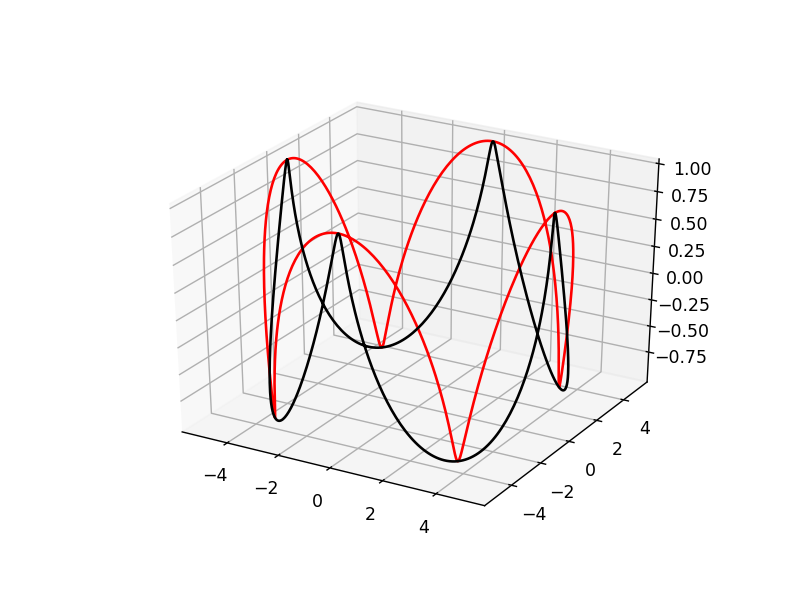

In [206]:
def discretize_and_plot(x, y, z, t0, tend, dt, ax, lcolor = 'blue'):
    '''
        Takes three (numpy compatible) functions for coordinates and plots on the given axis (3D) 
        for a given discretization (dt) of the time interval [t0, tend].
    '''
    ttab = np.linspace(t0, tend, int((tend-t0)//dt))
    xtab, ytab, ztab = x(ttab), y(ttab), z(ttab)
    ax.plot(xtab, ytab, ztab, color = lcolor)
    
# Red point:
redX = lambda t : L/2 * np.cos(omegaz * t) - R * np.sin(omegas * t) * np.sin(omegaz * t)
redY = lambda t : L/2 * np.sin(omegaz * t) + R * np.sin(omegas * t) * np.cos(omegaz * t)
redZ = lambda t : R * np.cos(omegas * t)

#Black point:
blackX = lambda t : -L/2 * np.cos(omegaz * t) - R * np.sin(omegas * t) * np.sin(omegaz * t)
blackY = lambda t : -L/2 * np.sin(omegaz * t) + R * np.sin(omegas * t) * np.cos(omegaz * t)
blackZ = lambda t : R * np.cos(omegas * t)

#Set the constants
L = 10
omegaz = 1
omegas = 4
R = 1
t0 = 0
tend = 2*np.pi
dt = 0.01

#Plot the motion
fig3D = plt.figure()
ax = fig3D.gca(projection='3d')

discretize_and_plot(redX, redY, redZ, t0, tend, dt, ax, 'red')
discretize_and_plot(blackX, blackY, blackZ, t0, tend, dt, ax, 'black')
plt.title('')
plt.show()

4. This dynamical system is complicated (non-linear and high-order). However, the information
we are interested in is only the moment when markers are visible. Represent, with Python
the place seen from above of markers when they are on top of the cylinder, z = R (this is a
Poincare cross-section!).

<IPython.core.display.Javascript object>


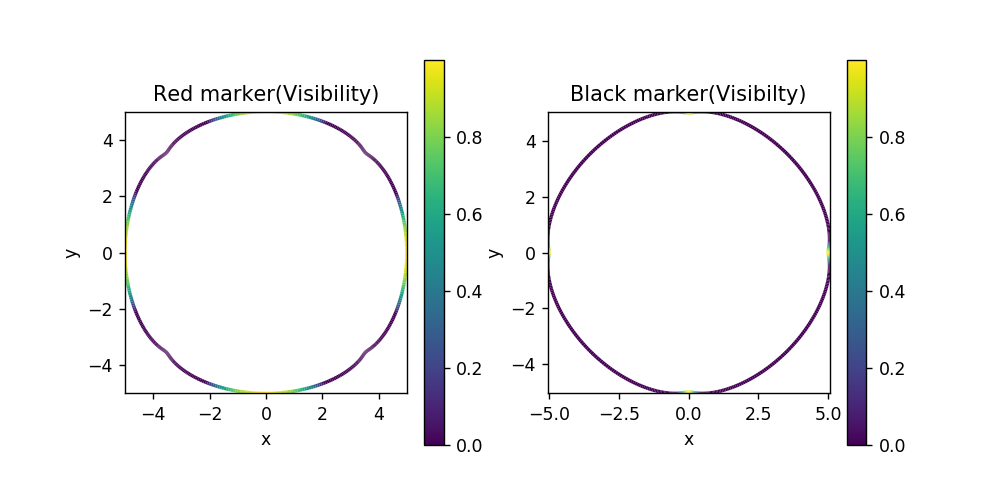

In [207]:
def color_plot(x, y, c, fig, ax):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(c.min(), c.max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    # Set the values used for colormapping
    lc.set_array(c)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    fig.colorbar(line, ax = ax)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())

def plot_visibility(x, y, z, t0, tend, dt, fig, ax):
    ttab = np.linspace(t0, tend, int((tend-t0)//dt))
    xtab, ytab, ztab = x(ttab), y(ttab), z(ttab)
    visibility = (ztab[1:-1] - R/2)/(R/2)
    visibility[visibility < 0] = 0
    color_plot(xtab, ytab, visibility, fig, ax)

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
axs[0].set_aspect('equal')
axs[0].set_title('Red marker(Visibility)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[1].set_aspect('equal')
axs[1].set_title('Black marker(Visibilty)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

plot_visibility(redX, redY, redZ, t0, tend, dt, fig, axs[0])
plot_visibility(blackX, blackY, blackZ, t0, tend, dt, fig, axs[1])

plt.show()

5. Under what condition will we see the marker exatly four times per turn? Can you interpret
in mechanical terms why this condition is realised? (indication: L = 8R.)

6. Represent the velocity associated with each marker at those moments. Why do we see only
one of the two markers?

<IPython.core.display.Javascript object>


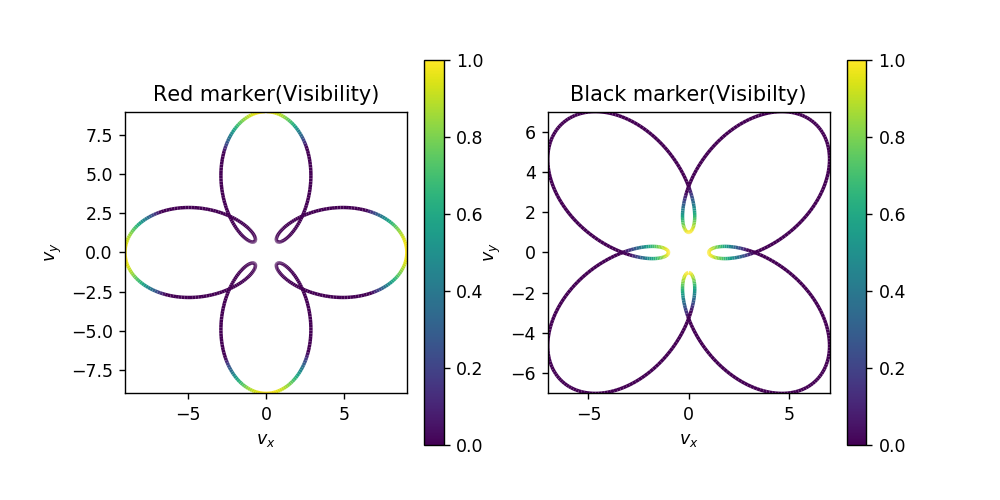

In [208]:
def plot_velocity_visibility(x, y, z, t0, tend, dt, fig, ax):
    ttab = np.linspace(t0, tend, int((tend-t0)//dt))
    xtab, ytab, ztab = x(ttab), y(ttab), z(ttab)
    vxtab, vytab = np.diff(xtab)/dt, np.diff(ytab)/dt
    visibility = (ztab - R/2)/(R/2)
    visibility[visibility < 0] = 0
    color_plot(vxtab, vytab, visibility, fig, ax)
    
fig, axs = plt.subplots(1, 2, figsize = (8, 4))
axs[0].set_aspect('equal')
axs[0].set_title('Red marker(Visibility)')
axs[0].set_xlabel('$v_x$')
axs[0].set_ylabel('$v_y$')
axs[1].set_aspect('equal')
axs[1].set_title('Black marker(Visibilty)')
axs[1].set_xlabel('$v_x$')
axs[1].set_ylabel('$v_y$')

plot_velocity_visibility(redX, redY, redZ, t0, tend, dt, fig, axs[0])
plot_velocity_visibility(blackX, blackY, blackZ, t0, tend, dt, fig, axs[1])

plt.show()    

We see only one marker because it passes with almost 0 velocity whilst the other one passes at very high velocity.

# Beam buckling and critical slowing down

Simplified modeling of beam buckling is being considered. $X$ measures the maximum amplitude
of the movement and $\mu$ is a parameter related to the force exerted on the beam. For a certain
value of this parameter, the rectilinear beam ceases to be stable, and the beam buckles either up
or down.
This problem can be modeled by a low order dynamical model
$$
\dot{X} = \mu X - X^3
$$

1. Identify the fixed points of this system depending on the value of $\mu$.

The fixed points are given by:
$$
\mu X = X^3 \Leftrightarrow \mu = X^2 \lor X = 0
$$

2. Study their stability (at fixed $\mu$).

For $\mu < 0$ the only fixed point is for $X = 0$ and supposing we move slightly away from it:
$$
\dot{\epsilon} = \mu \epsilon - \epsilon^3 \approx \mu \epsilon \Leftrightarrow \epsilon = A e^{-|\mu| t}
$$
Hence the equilibrium is stable. Now at $\mu > 0$ an offset from the fixed point $X = 0$ is described by:
$$
\epsilon = A e^{|\mu| t}
$$
Which is therefore unstable. However an offset from the equilibrium $X = \sqrt{\mu}$ is described by:
$$
\dot{\epsilon} = \mu (\sqrt{\mu} + \epsilon) - (\sqrt{\mu} + \epsilon)^3 \approx \mu^{3/2} + \mu \epsilon - \mu^{3/2} - 3 \mu \epsilon = - 2 \mu \epsilon \Leftrightarrow \epsilon = A e^{- 2 |\mu| t}
$$
So this equilbrium is stable, same goes for $X = - \sqrt{\mu}$.

3. Graphically represent the phase portrait of this problem, using Python, for $\mu = -10$ ; $\mu = 0$ ;
$\mu = 10$.

<IPython.core.display.Javascript object>


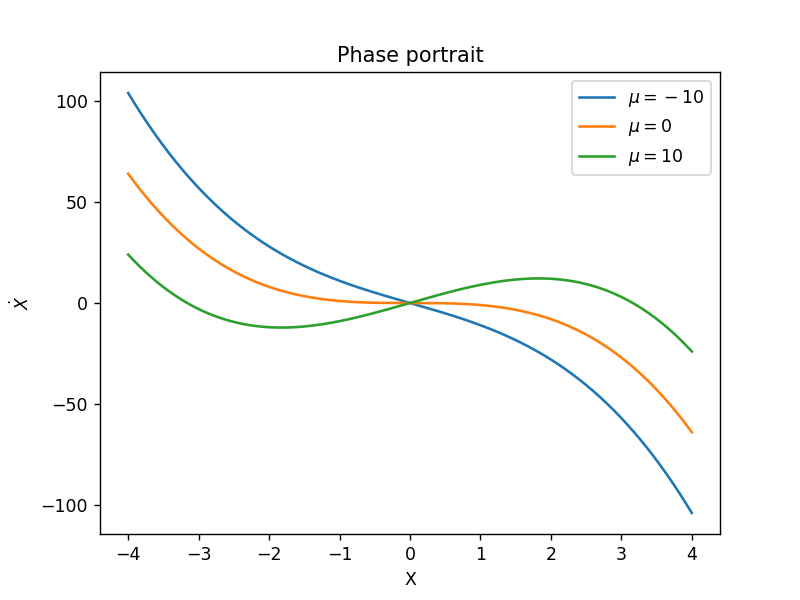

In [209]:
minX = -4
maxX = 4
nb = 1000
mu = 10

def dX(X):
        return mu*X - X**3
    
Xtab = np.linspace(minX, maxX, nb)

fig = plt.figure()
mu = -10
plt.plot(Xtab, dX(Xtab), label = "$\mu = -10$")
mu = 0
plt.plot(Xtab, dX(Xtab), label = "$\mu = 0$")
mu = 10
plt.plot(Xtab, dX(Xtab), label = "$\mu = 10$")

plt.title('Phase portrait')
plt.xlabel('X')
plt.ylabel('$\dot{X}$')
plt.legend()
plt.show()

4. Graphically represent the potential of this problem, using Python, for $\mu = -10$ ; $\mu = 0$ ;
$\mu = 10$.

Assuming this is a conservative behavior we have:
$$
E_\text{tot} = U + \frac{1}{2} m \dot{X}^2 \Leftrightarrow U = E_\text{tot} - \frac{1}{2} m \dot{X}^2 = - \frac{1}{2} m \dot{X}^2
$$

<IPython.core.display.Javascript object>


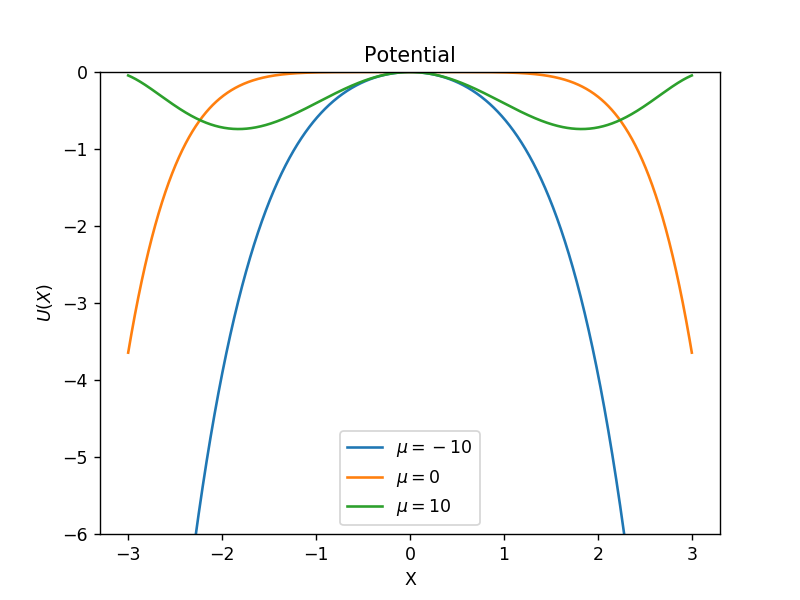

In [210]:
m = 0.01

def pot(X):
    return -1/2 * m * dX(X)**2

minX, maxX = -3, 3

Xtab = np.linspace(minX, maxX, nb)

fig = plt.figure()
mu = -10
plt.plot(Xtab, pot(Xtab), label = "$\mu = -10$")
mu = 0
plt.plot(Xtab, pot(Xtab), label = "$\mu = 0$")
mu = 10
plt.plot(Xtab, pot(Xtab), label = "$\mu = 10$")

plt.title('Potential')
plt.xlabel('X')
plt.ylabel('$U(X)$')
plt.ylim((-6, 0))
plt.legend()
plt.show()

5. Let us now consider the vicinity of instability, for simplicity, we will assume $\mu = 0$. Show
that $X \to 0$ when $t \to +\infty$; but that the decay is not exponential in this case.

Assume an infinitesimal displacement $\epsilon$ from the stationnary point $X = 0$. Then we have the following:
$$
\dot{\epsilon} = \mu \epsilon - \epsilon^3 = - \epsilon^3 \Rightarrow \epsilon(t) = \pm \frac{1}{\sqrt{2t + \frac{1}{\epsilon(0)^2}}} \longrightarrow 0 \text{ when } t \to +\infty
$$